# Pipeline de Transformation de Données ITSM vers Helpdesk

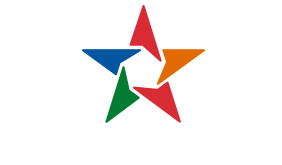

## Objectif
Ce notebook présente un pipeline de transformation des données ITSM en format helpdesk standardisé. Il permet de:
- Transformer la structure des données ITSM vers le format helpdesk requis
- Nettoyer et valider la qualité des données transformées
- Générer un dataset structuré prêt pour l'analyse
- Documenter les correspondances et transformations appliquées

### Transformations appliquées :
- **Mapping des colonnes** : Conversion des champs ITSM vers structure cible
- **Mapping des valeurs** : Standardisation des catégories et statuts
- **Nettoyage des données** : Suppression des valeurs manquantes critiques
- **Validation** : Contrôle de la qualité des données transformées

## Plan du Notebook
1. **Configuration & Métadonnées** - Setup du projet
2. **Imports & Environnement** - Librairies requises
3. **Chargement des Données** - Import du fichier ITSM source
4. **Exploration des Données** - Analyse du dataset source
5. **Transformation des Données** - Application du mapping
6. **Nettoyage & Validation** - Contrôle qualité
7. **Analyse des Résultats** - Métriques de transformation
8. **Export & Sauvegarde** - Génération des fichiers finaux

### Cellule 1: Configuration et Métadonnées

In [23]:
from datetime import datetime
import warnings
import sys
import os

# Suppression des avertissements
warnings.filterwarnings('ignore')

# Configuration du projet
PROJECT_CONFIG = {
    'Nom du projet': 'Transformation ITSM → Helpdesk SNRT',
    'Environnement': 'Google Colab',
    'Version': '1.0',
    'Auteur': 'Aymane ISSAMI',
    'Date d\'exécution': datetime.now().strftime('%Y-%m-%d'),
    'Objectif': "Transformation des données ITSM vers format helpdesk standardisé",
    'Source': 'ITSM_data.csv',
    'Destination': 'Data_Helpdesk_New_From_ITSM.xlsx',
}

print("LANCEMENT DU PIPELINE DE TRANSFORMATION DE DONNÉES")
print("=" * 70)
for key, value in PROJECT_CONFIG.items():
    print(f"{key:<20}: {value}")
print("=" * 70)
print("Status: Initialisation du pipeline...")

LANCEMENT DU PIPELINE DE TRANSFORMATION DE DONNÉES
Nom du projet       : Transformation ITSM → Helpdesk SNRT
Environnement       : Google Colab
Version             : 1.0
Auteur              : Aymane ISSAMI
Date d'exécution    : 2025-08-04
Objectif            : Transformation des données ITSM vers format helpdesk standardisé
Source              : ITSM_data.csv
Destination         : Data_Helpdesk_New_From_ITSM.xlsx
Status: Initialisation du pipeline...


### Cellule 2: Imports et Configuration

In [24]:
# Imports des librairies nécessaires
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppression des avertissements
warnings.filterwarnings('ignore')

# Configuration des options d'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Configuration terminée")

Configuration terminée


### Cellule 3: Chargement des Données ITSM

In [25]:
print("Chargement des données...")

try:
    df_itsm = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/ITSM_data.csv')
    print(f"Dataset chargé: {df_itsm.shape[0]:,} lignes × {df_itsm.shape[1]} colonnes")
except Exception as e:
    print(f"Erreur lors du chargement: {e}")
    from google.colab import files
    uploaded = files.upload()
    df_itsm = pd.read_csv(list(uploaded.keys())[0])
    print(f"Dataset chargé: {df_itsm.shape[0]:,} lignes × {df_itsm.shape[1]} colonnes")

# Informations sur le dataset source
print("\nInformations sur les données ITSM:")
print(df_itsm.info())
print(f"\nNoms des colonnes: {list(df_itsm.columns)}")
print(f"\nPremières lignes:")
display(df_itsm.head())

Chargement des données...
Dataset chargé: 46,606 lignes × 25 colonnes

Informations sur les données ITSM:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-n

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,5/2/2012 13:32,NaN,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12/3/2012 15:44,2/12/2013 12:31,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10/8/2012 11:01,NaN,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


### Cellule 4: Exploration des Données Source

In [26]:
print("Analyse exploratoire des données source")
print("=" * 50)

# Statistiques descriptives
print("Statistiques générales:")
print(f"Nombre de lignes: {len(df_itsm):,}")
print(f"Nombre de colonnes: {len(df_itsm.columns)}")
print(f"Taille mémoire: {df_itsm.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Analyse des valeurs manquantes
print("\nValeurs manquantes par colonne:")
missing_data = df_itsm.isnull().sum()
for col, count in missing_data.items():
    if count > 0:
        percentage = (count / len(df_itsm)) * 100
        print(f"   {col}: {count:,} ({percentage:.1f}%)")

# Analyse des colonnes clés
if 'Category' in df_itsm.columns:
    print(f"\nDistribution des catégories:")
    category_counts = df_itsm['Category'].value_counts()
    for cat, count in category_counts.items():
        percentage = (count / len(df_itsm)) * 100
        print(f"   {cat}: {count:,} ({percentage:.1f}%)")

if 'Status' in df_itsm.columns:
    print(f"\nDistribution des statuts:")
    status_counts = df_itsm['Status'].value_counts()
    for status, count in status_counts.items():
        percentage = (count / len(df_itsm)) * 100
        print(f"   {status}: {count:,} ({percentage:.1f}%)")

if 'CI_Subcat' in df_itsm.columns:
    print(f"\nTop 10 des types d'équipement:")
    top_equipment = df_itsm['CI_Subcat'].value_counts().head(10)
    for eq, count in top_equipment.items():
        print(f"   {eq}: {count:,}")

Analyse exploratoire des données source
Statistiques générales:
Nombre de lignes: 46,606
Nombre de colonnes: 25
Taille mémoire: 54.86 MB

Valeurs manquantes par colonne:
   CI_Cat: 111 (0.2%)
   CI_Subcat: 111 (0.2%)
   Priority: 1,380 (3.0%)
   No_of_Reassignments: 1 (0.0%)
   Reopen_Time: 44,322 (95.1%)
   Resolved_Time: 1,780 (3.8%)
   Handle_Time_hrs: 1 (0.0%)
   Closure_Code: 460 (1.0%)
   No_of_Related_Interactions: 114 (0.2%)
   No_of_Related_Incidents: 45,384 (97.4%)
   No_of_Related_Changes: 46,046 (98.8%)
   Related_Change: 46,046 (98.8%)

Distribution des catégories:
   incident: 37,748 (81.0%)
   request for information: 8,846 (19.0%)
   complaint: 11 (0.0%)
   request for change: 1 (0.0%)

Distribution des statuts:
   Closed: 46,597 (100.0%)
   Work in progress: 9 (0.0%)

Top 10 des types d'équipement:
   Server Based Application: 18,811
   Web Based Application: 15,311
   Desktop Application: 3,876
   Laptop: 1,921
   SAP: 1,199
   Banking Device: 916
   Citrix: 767
   SA

### Cellule 5: Transformation des Données

In [27]:
print("Création de la nouvelle structure de données...")

# Création du nouveau DataFrame
df_new = pd.DataFrame()

# Mapping des colonnes selon les règles définies
df_new['CodeIntervention'] = 'IT' + df_itsm['Incident_ID'].astype(str)

df_new['TypeIntervention'] = df_itsm['Category'].map({
    'incident': 'incident',
    'request for information': 'demande_info',
    'complaint': 'reclamation',
    'request for change': 'demande_changement'
}).fillna('incident')

df_new['DescriptionInterv'] = 'Intervention: ' + df_itsm['Category'].astype(str) + ' - ' + df_itsm['KB_number'].astype(str)

df_new['code_equipement'] = df_itsm['CI_Name']
df_new['equipement'] = df_itsm['CI_Subcat']

df_new['statut'] = df_itsm['Status'].map({
    'Closed': 'fermé',
    'Work in progress': 'en cours'
}).fillna('en cours')

df_new['DateDebut'] = df_itsm['Open_Time']

print(f"Nouveau dataset créé avec {df_new.shape[0]:,} lignes")
print(f"Colonnes: {list(df_new.columns)}")

# Correspondance des colonnes
print("\nCorrespondance des colonnes:")
mapping_info = {
    'Incident_ID': 'CodeIntervention (avec préfixe IT)',
    'Category': 'TypeIntervention (mapping valeurs)',
    'Category + KB_number': 'DescriptionInterv (concaténation)',
    'CI_Name': 'code_equipement (mapping direct)',
    'CI_Subcat': 'equipement (mapping direct)',
    'Status': 'statut (mapping valeurs)',
    'Open_Time': 'DateDebut (mapping direct)'
}

for source, target in mapping_info.items():
    print(f"   {source} → {target}")

Création de la nouvelle structure de données...
Nouveau dataset créé avec 46,606 lignes
Colonnes: ['CodeIntervention', 'TypeIntervention', 'DescriptionInterv', 'code_equipement', 'equipement', 'statut', 'DateDebut']

Correspondance des colonnes:
   Incident_ID → CodeIntervention (avec préfixe IT)
   Category → TypeIntervention (mapping valeurs)
   Category + KB_number → DescriptionInterv (concaténation)
   CI_Name → code_equipement (mapping direct)
   CI_Subcat → equipement (mapping direct)
   Status → statut (mapping valeurs)
   Open_Time → DateDebut (mapping direct)


### Cellule 6: Nettoyage et Validation

In [28]:
print("Nettoyage des données...")

# Vérification des valeurs manquantes avant nettoyage
print("Valeurs manquantes avant nettoyage:")
missing_summary = df_new.isnull().sum()
for col, count in missing_summary.items():
    if count > 0:
        print(f"   {col}: {count:,} valeurs manquantes")
if missing_summary.sum() == 0:
    print("   Aucune valeur manquante détectée")

# Nettoyage des données - Suppression des lignes avec valeurs manquantes critiques
initial_rows = len(df_new)
df_new = df_new.dropna(subset=['code_equipement', 'equipement'])
final_rows = len(df_new)
rows_removed = initial_rows - final_rows

print(f"Lignes supprimées (valeurs manquantes dans les champs clés): {rows_removed:,}")
print(f"Dataset final: {final_rows:,} lignes")

# Vérification finale des valeurs manquantes
final_missing = df_new.isnull().sum()
if final_missing.sum() > 0:
    print("Valeurs manquantes restantes:")
    for col, count in final_missing.items():
        if count > 0:
            print(f"   {col}: {count:,}")
else:
    print("Aucune valeur manquante dans les champs essentiels")

Nettoyage des données...
Valeurs manquantes avant nettoyage:
   equipement: 111 valeurs manquantes
Lignes supprimées (valeurs manquantes dans les champs clés): 111
Dataset final: 46,495 lignes
Aucune valeur manquante dans les champs essentiels


### Cellule 7: Analyse des Résultats

In [29]:
print("Résumé du dataset final:")
print(f"   Dimensions: {df_new.shape}")
print(f"   Colonnes: {list(df_new.columns)}")

# Échantillon du nouveau dataset
print("Échantillon du nouveau dataset:")
display(df_new.head(10))

# Analyse des données transformées
print("Analyse des données:")
print(f"   TypeIntervention: {df_new['TypeIntervention'].nunique():,} valeurs uniques")
print(f"   Statut: {df_new['statut'].nunique():,} valeurs uniques")
print(f"   Code équipement: {df_new['code_equipement'].nunique():,} codes uniques")
print(f"   Équipement: {df_new['equipement'].nunique():,} types uniques")

print(f"Valeurs TypeIntervention: {list(df_new['TypeIntervention'].unique())}")
print(f"Valeurs Statut: {list(df_new['statut'].unique())}")

# Distribution des types d'intervention
print("Distribution TypeIntervention:")
type_counts = df_new['TypeIntervention'].value_counts()
for intervention_type, count in type_counts.items():
    print(f"   {intervention_type}: {count:,} ({count/len(df_new)*100:.1f}%)")

# Distribution des statuts
print("Distribution Statut:")
status_counts = df_new['statut'].value_counts()
for status, count in status_counts.items():
    print(f"   {status}: {count:,} ({count/len(df_new)*100:.1f}%)")

Résumé du dataset final:
   Dimensions: (46495, 7)
   Colonnes: ['CodeIntervention', 'TypeIntervention', 'DescriptionInterv', 'code_equipement', 'equipement', 'statut', 'DateDebut']
Échantillon du nouveau dataset:


,CodeIntervention,TypeIntervention,DescriptionInterv,code_equipement,equipement,statut,DateDebut
0,ITIM0000004,incident,Intervention: incident - KM0000553,SUB000508,Web Based Application,fermé,5/2/2012 13:32
1,ITIM0000005,incident,Intervention: incident - KM0000611,WBA000124,Web Based Application,fermé,12/3/2012 15:44
2,ITIM0000006,demande_info,Intervention: request for information - KM0000339,DTA000024,Desktop Application,fermé,29-03-2012 12:36
3,ITIM0000011,incident,Intervention: incident - KM0000611,WBA000124,Web Based Application,fermé,17-07-2012 11:49
4,ITIM0000012,incident,Intervention: incident - KM0000611,WBA000124,Web Based Application,fermé,10/8/2012 11:01
5,ITIM0000013,incident,Intervention: incident - KM0000611,WBA000124,Web Based Application,fermé,10/8/2012 11:27
6,ITIM0000014,incident,Intervention: incident - KM0000401,WBA000082,Web Based Application,fermé,15-08-2012 14:17
7,ITIM0000015,incident,Intervention: incident - KM0000611,WBA000124,Web Based Application,fermé,22-08-2012 16:31
8,ITIM0000017,incident,Intervention: incident - KM0000611,WBA000124,Web Based Application,fermé,29-08-2012 15:59
9,ITIM0000018,incident,Intervention: incident - KM0000401,WBA000082,Web Based Application,fermé,3/9/2012 16:04


Analyse des données:
   TypeIntervention: 4 valeurs uniques
   Statut: 2 valeurs uniques
   Code équipement: 2,999 codes uniques
   Équipement: 64 types uniques
Valeurs TypeIntervention: ['incident', 'demande_info', 'reclamation', 'demande_changement']
Valeurs Statut: ['fermé', 'en cours']
Distribution TypeIntervention:
   incident: 37,651 (81.0%)
   demande_info: 8,832 (19.0%)
   reclamation: 11 (0.0%)
   demande_changement: 1 (0.0%)
Distribution Statut:
   fermé: 46,486 (100.0%)
   en cours: 9 (0.0%)


### Cellule 8: Export et Sauvegarde

In [30]:
print("Sauvegarde des résultats...")

# Sauvegarde en format Excel
try:
    excel_filename = 'Data_Helpdesk_New_From_ITSM.xlsx'
    df_new.to_excel(excel_filename, index=False)
    print(f"Version Excel créée: '{excel_filename}'")
except ImportError:
    print("Installation requise pour Excel: !pip install openpyxl")

# Téléchargement des fichiers en environnement Google Colab
try:
    from google.colab import files
    if 'excel_filename' in locals():
        files.download(excel_filename)
        print(f"Téléchargement automatique: {excel_filename}")
except ImportError:
    print("Fichiers sauvegardés localement (hors environnement Colab)")

print("\n" + "="*80)
print("TRAITEMENT TERMINÉ")
print(f"Nouveau dataset helpdesk créé avec {len(df_new):,} enregistrements")
print("\nCorrespondance des colonnes:")
print("   • CodeIntervention ← Généré à partir de Incident_ID")
print("   • TypeIntervention ← Mappé depuis Category")
print("   • DescriptionInterv ← Généré depuis Category + KB_number")
print("   • code_equipement ← Mappé depuis CI_Name")
print("   • equipement ← Mappé depuis CI_Subcat")
print("   • statut ← Mappé depuis Status")
print("   • DateDebut ← Mappé depuis Open_Time")
print("="*80)

Sauvegarde des résultats...
Version Excel créée: 'Data_Helpdesk_New_From_ITSM.xlsx'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Téléchargement automatique: Data_Helpdesk_New_From_ITSM.xlsx

TRAITEMENT TERMINÉ
Nouveau dataset helpdesk créé avec 46,495 enregistrements

Correspondance des colonnes:
   • CodeIntervention ← Généré à partir de Incident_ID
   • TypeIntervention ← Mappé depuis Category
   • DescriptionInterv ← Généré depuis Category + KB_number
   • code_equipement ← Mappé depuis CI_Name
   • equipement ← Mappé depuis CI_Subcat
   • statut ← Mappé depuis Status
   • DateDebut ← Mappé depuis Open_Time
